
#Primera Entrega

El dataset "telco.csv" contiene información sobre los clientes de una empresa ficticia que brinda servicios de telefonía e internet en el estado de California. Se incluyen datos demográficos, así como el detalle del servicio brindado, consumo, tiempo de permanencia, satisfacción, si el cliente abandonó el servicio y el motivo por el cual lo hizo.<br><br>
Explorar este conjunto permitirá comprender los factores que influyen en la retención y formular estrategias para mejorar la satisfacción y la lealtad de los clientes de la empresa.<br><br>
Este análisis está dirigido a tomadores de decisiones interesados en mejorar la retención de clientes y optimizar servicios dentro de la industria de telecomunicaciones.<br><br>
Listado de variables:<br>
* Customer ID: identificador único del cliente
* Gender: género
* Age: edad
* Senior Citizen: si es o no de tercera edad
* Married: si es o no casado
* Dependents: si tiene alguna persona a cargo
* Number of dependents: cantidad de personas a cargo
* City: ciudad
* Zipcode: código postal
* Latitud: coordenada x en el mapa
* Longitud: coordenanda y en el mapa
* Population: cantidad de personas en el área del código postal
* Referred a friend: si refirió a alguien
* Number of referrals: cantidad de personas referidas
* Tenure in months: cantidad de meses de permanencia
* Offer: tipo de oferta adquirida
* Phone service: si tiene o no el servicio de telefonía
* Avg monthly long distance charges: promedio de cargos por servicio a larga distancia
* Multiple lines: si cuenta o no con más de una línea
* Internet service: si tiene o no el servicio de internet
* Internet type: tipo de internet
* Avg monthly GB download: cantidad en GB de contenido descargado
* Online security: si tiene o no el servicio de seguridad
* Online backup: si tiene o no el servicio de restauración online
* Device protection plan: si tiene o no el seguro de protección de dispósitivo
* Premium tech support: si tiene o no el servicio de soporte técnico premium
* Streaming TV: si tiene o no el servicio de transmisión TV
* Streaming movies: si tiene o no el servicio de transmisión de películas
* Streaming music: si tiene o no el servicio de transmisión de música
* Unlimited data: si tiene o no un plan ilimitado de datos
* Contract: tipo de contrato
* Payment method: método de pago
* Monthly charge: monto base mensual en USD
* Total charges: monto total por tiempo de servicio en USD
* Total refunds: monto total devuelto en USD
* Total extra data charges: monto adicional por uso de datos en USD
* Total long distance charges: monto adicional por llamadas a larga distancia en USD
* Total revenue: ganancia generada por la empresa en USD
* Satisfaction score: puntaje de satisfacción del cliente
* Customer status: estado del cliente según afiliación a la empresa
* Churn label: si el cliente abandonó
* Churn score: probabilidad de abandono del cleinte según modelo predictivo
* CLTV: valor en el ciclo de vida del cliente
* Churn category: razón por la cual el cliente abandonó










## Hipótesis y preguntas a resolver
1. ¿Cuál es el perfil de un cliente que genera alto valor (CLTV) para la empresa?
2. ¿Qué factores influyen sobre la satisfacción del cliente?
3. ¿Qué factores influyen sobre la probabilidad de abandono del cliente?
4. ¿Existe correlación entre la satisfacción del cliente y la probabilidad de abandono?

# Análisis Exploratorio

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv('/content/telco.csv')
print(df.head())

  Customer ID  Gender  Age Senior Citizen Married Dependents  \
0  8779-QRDMV    Male   78            Yes      No         No   
1  7495-OOKFY  Female   74            Yes     Yes        Yes   
2  1658-BYGOY    Male   71            Yes      No        Yes   
3  4598-XLKNJ  Female   78            Yes     Yes        Yes   
4  4846-WHAFZ  Female   80            Yes     Yes        Yes   

   Number of Dependents         City  Zip Code   Latitude  ...  Total Refunds  \
0                     0  Los Angeles     90022  34.023810  ...           0.00   
1                     1  Los Angeles     90063  34.044271  ...           0.00   
2                     3  Los Angeles     90065  34.108833  ...          45.61   
3                     1    Inglewood     90303  33.936291  ...          13.43   
4                     1     Whittier     90602  33.972119  ...           0.00   

   Total Extra Data Charges Total Long Distance Charges  Total Revenue  \
0                        20                        0.0

In [ ]:
df.shape

(7043, 44)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Senior Citizen                     7043 non-null   object 
 4   Married                            7043 non-null   object 
 5   Dependents                         7043 non-null   object 
 6   Number of Dependents               7043 non-null   int64  
 7   City                               7043 non-null   object 
 8   Zip Code                           7043 non-null   int64  
 9   Latitude                           7043 non-null   float64
 10  Longitude                          7043 non-null   float64
 11  Population                         7043 non-null   int64

La columna churn category es la única que tiene registros nulos, sin embargo, esto forma parte de la naturaleza del data set, ya que este campo solo debe tener valores en caso el cliente haya abandonado la empresa.

In [ ]:
#Identificar y redondear los valores float
float_columns = df.select_dtypes(include=['float64']).columns

# Redondear a 2 decimales
df[float_columns] = df[float_columns].round(2)
df[float_columns].head()


,Latitude,Longitude,Avg Monthly Long Distance Charges,Monthly Charge,Total Charges,Total Refunds,Total Long Distance Charges,Total Revenue
0,34.02,-118.16,0.00,39.65,39.65,0.00,0.00,59.65
1,34.04,-118.19,48.85,80.65,633.30,0.00,390.80,1024.10
2,34.11,-118.23,11.33,95.45,1752.55,45.61,203.94,1910.88
3,33.94,-118.33,19.76,98.50,2514.50,13.43,494.00,2995.07
4,33.97,-118.02,6.33,76.50,2868.15,0.00,234.21,3102.36


Esto facilitará la visualización y el tratamiento de los datos.

In [ ]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000


In [ ]:
df.describe(include='object')

,Customer ID,Gender,Senior Citizen,Married,Dependents,City,Referred a Friend,Offer,Phone Service,Multiple Lines,...,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Payment Method,Customer Status,Churn Label,Churn Category
count,7043,7043,7043,7043,7043,7043,7043,3166,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043,7043,1869
unique,7043,2,2,2,2,1106,2,5,2,2,...,2,2,2,2,2,3,3,3,2,5
top,8779-QRDMV,Male,No,No,No,Los Angeles,No,Offer B,Yes,No,...,No,No,No,No,Yes,Month-to-Month,Bank Withdrawal,Stayed,No,Competitor
freq,1,3555,5901,3641,5416,293,3821,824,6361,4072,...,4999,4336,4311,4555,4745,3610,3909,4720,5174,841


## 1. ¿Cuál es el perfil de un cliente que genera alto valor (CLTV) para la empresa?

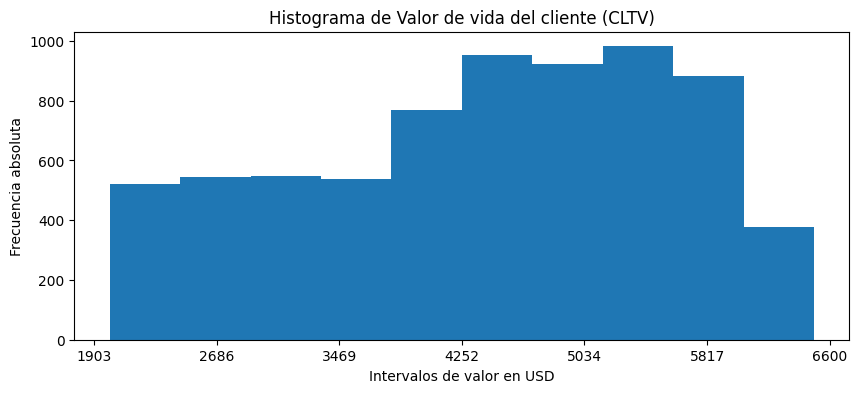

In [ ]:
import numpy as np
valores_referencia = np.linspace(min(df['CLTV']) - 100, max(df['CLTV']) + 100, num=7)
valores_referencia = np.round(valores_referencia).astype(int)

fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(df['CLTV'], bins=10)
ax.set_title('Histograma de Valor de vida del cliente (CLTV)')
ax.set_xlabel('Intervalos de valor en USD')
ax.set_ylabel('Frecuencia absoluta')

ax.set_xticks(valores_referencia)
ax.set_xticklabels(valores_referencia)

plt.show()

El rango de CLTV con mayor frecuencia se encuentra entre USD 4,000 y USD 6,000, por lo que se puede decir que la mayoría de clientes generan dcho beneficio en su tiempo de vida dentro de la empresa. Además, se observa que los intervalos tienen una frecuencia muy similar entre los USD 2,000 y USD 4,000 así como entre los USD 4,000 y USD 6,000, loq que evidencia estabilidad en el comportamiento dentro de estos dos rangos.

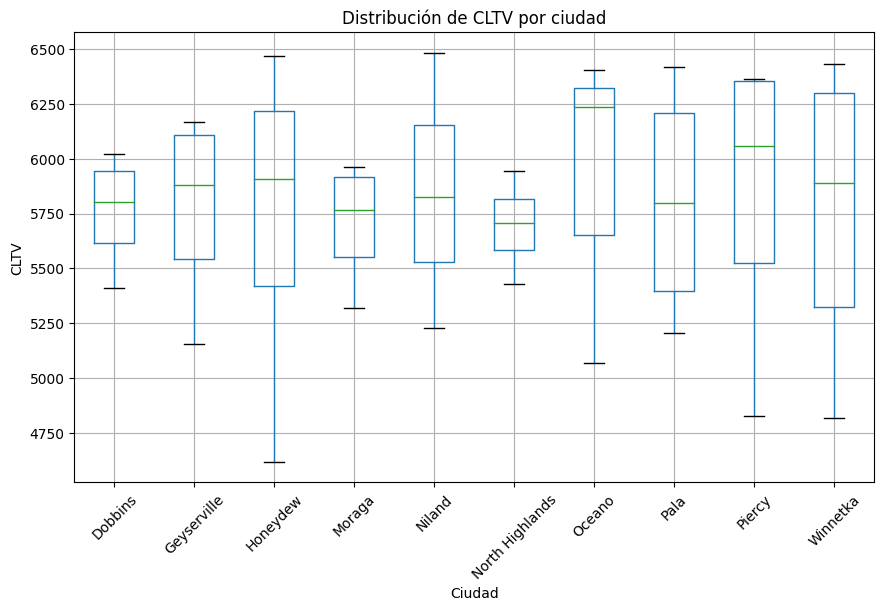

In [ ]:
# Calcular el CLTV promedio para cada ciudad
cltv_por_ciudad = df.groupby('City')['CLTV'].mean()

# Ordenar las ciudades por CLTV de mayor a menor y seleccionar las 10 primeras
top_10_ciudades = cltv_por_ciudad.sort_values(ascending=False).head(10)

# Filtrar el DataFrame original para incluir solo los datos de estas 10 ciudades
df_top_10 = df[df['City'].isin(top_10_ciudades.index)]

# Distribución de CLTV por ciudad
fig, ax = plt.subplots(figsize=(10, 6))
df_top_10.boxplot(column='CLTV', by='City', ax=ax)
ax.set_title('Distribución de CLTV por ciudad')
ax.set_xlabel('Ciudad')
ax.set_ylabel('CLTV')
plt.xticks(rotation=45)
plt.suptitle('')
plt.show()


En el boxplot del top 10 ciudades se observa que la ciudad donde se concentran la mayor cantidad de clientes con un alto CLTV es Oceano, seguida por Piercy. En el reso de ciudades se observa una distribución más homogénea.

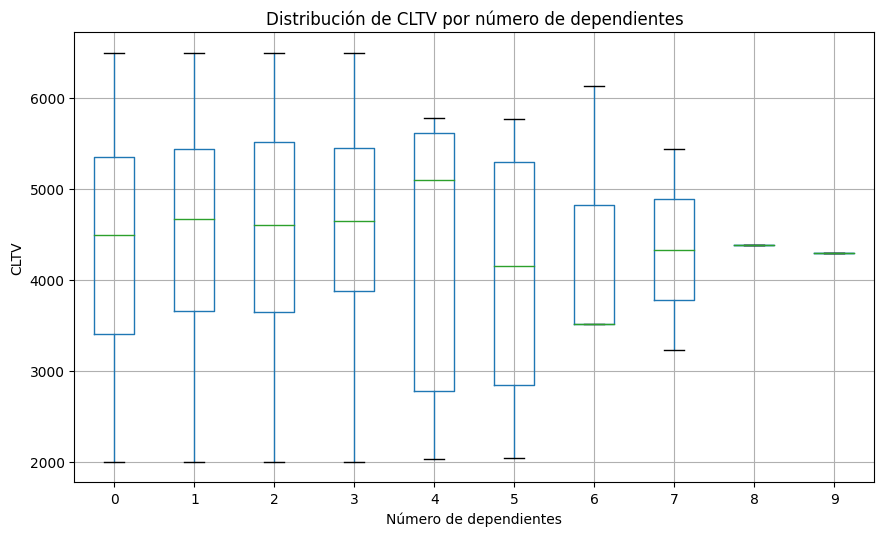

In [ ]:
# Distribución de CLTV por número de dependientes
fig, ax = plt.subplots(figsize=(10, 6))
df.boxplot(column='CLTV', by='Number of Dependents', ax=ax)
ax.set_title('Distribución de CLTV por número de dependientes')
ax.set_xlabel('Número de dependientes')
ax.set_ylabel('CLTV')
plt.suptitle('')
plt.show()

El segmento con los valores de CLTV más alto es el de 4 dependientes. También se observa que los cliente con 0, 1, 2 y 3 dependientes tiene CLTV similares.A partir de 5 dependientes la mediana disminuye y no se observa un patrón en el CLTV.

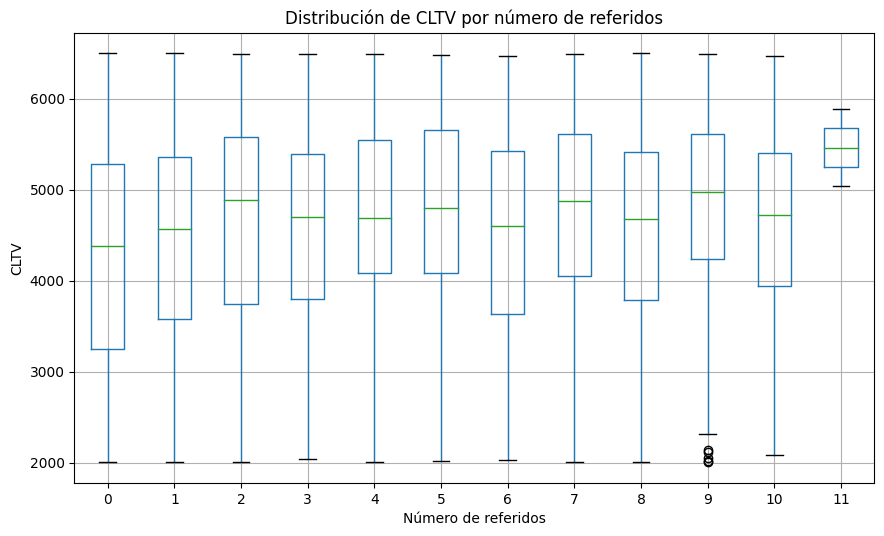

In [ ]:
# Distribución de CLTV por número de referidos
fig, ax = plt.subplots(figsize=(10, 6))
df.boxplot(column='CLTV', by='Number of Referrals', ax=ax)
ax.set_title('Distribución de CLTV por número de referidos')
ax.set_xlabel('Número de referidos')
ax.set_ylabel('CLTV')
plt.suptitle('')
plt.show()

La distribución de CLTV por número de referidos es similar entre los segmentos. También se observa que el número mximo de referidos (11) se asocia al mayor CLTV, con el rango más estrecho de todos los segmentos.


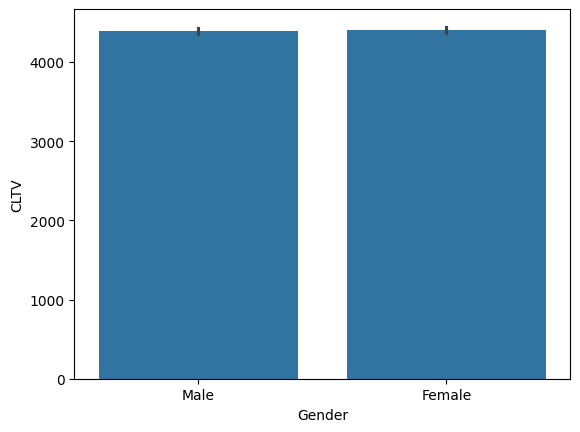

In [ ]:
#Barplot
ax = sns.barplot(x="Gender", y="CLTV", data=df)

No se observa diferencia entre géneros

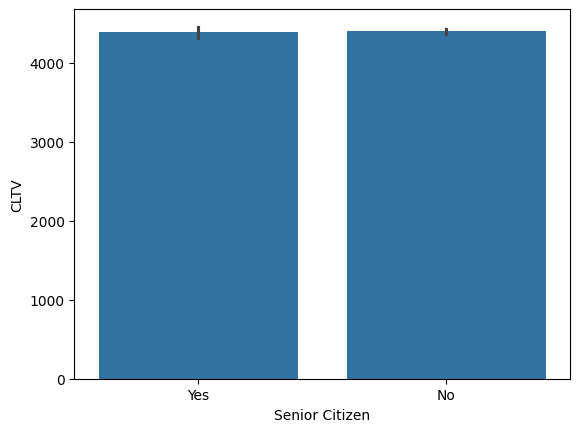

In [ ]:
ax = sns.barplot(x="Senior Citizen", y="CLTV", data=df)

No se observa diferencia entre segmentos

## 2. ¿Qué factores influyen sobre la satisfacción del cliente?

La variable Satisfaction Score contiene el puntaje que representa la satisfacción del cliente con los servicios brindados por la empresa, donde 1: poco satisfecho, 2: medianamente satifecho, 3: muy satisfecho.

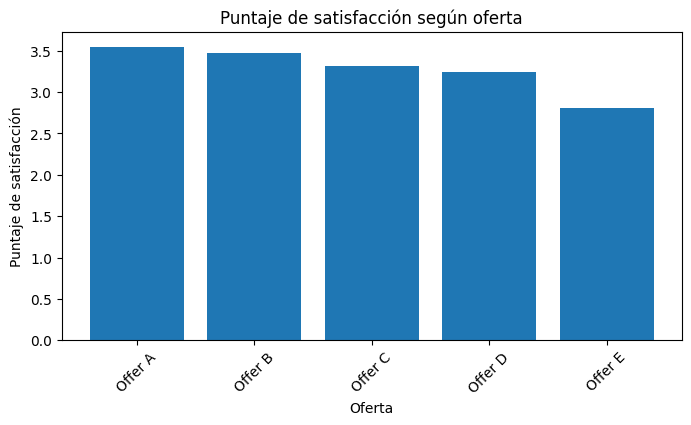

In [ ]:
# Agrupar los datos por la variable "Offer" y calcular el promedio de "Satisfaction Score" para cada categoría
satisfaction_por_oferta = df.groupby('Offer')['Satisfaction Score'].mean()


fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(satisfaction_por_oferta.index, satisfaction_por_oferta)
ax.set_title('Puntaje de satisfacción según oferta')
ax.set_xlabel('Oferta')
ax.set_ylabel('Puntaje de satisfacción')
ax.tick_params(axis='x', rotation=45)
plt.show()

Se observa que la oferta E es la de menor promedio de satisfacción, sin embargo, no se encuentra gran diferencia entre las ofertas A, B, C y D.

In [ ]:
satisfaction_por_contrato = df.groupby('Contract')['Satisfaction Score'].mean()
print(satisfaction_por_contrato)

Contract
Month-to-Month    2.871745
One Year          3.578710
Two Year          3.685608
Name: Satisfaction Score, dtype: float64


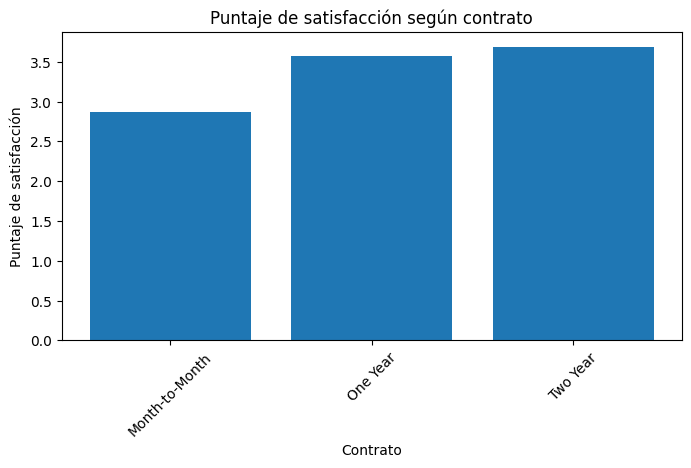

In [ ]:
satisfaction_por_contrato = df.groupby('Contract')['Satisfaction Score'].mean()


fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(satisfaction_por_contrato.index, satisfaction_por_contrato)
ax.set_title('Puntaje de satisfacción según contrato')
ax.set_xlabel('Contrato')
ax.set_ylabel('Puntaje de satisfacción')
ax.tick_params(axis='x', rotation=45)
plt.show()

Se observa que los clientes con el tipo de contrato mes a mes son aquellos con el menor punaaje de satisfacción.

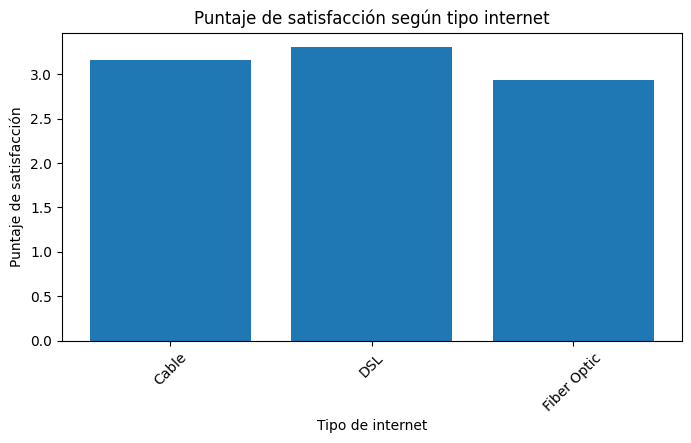

In [ ]:
satisfaction_por_internet = df.groupby('Internet Type')['Satisfaction Score'].mean()


fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(satisfaction_por_internet.index, satisfaction_por_internet)
ax.set_title('Puntaje de satisfacción según tipo internet')
ax.set_xlabel('Tipo de internet')
ax.set_ylabel('Puntaje de satisfacción')
ax.tick_params(axis='x', rotation=45)
plt.show()

Los clientes que tienen el tipo de internet fibra óptica son aquellos con menor puntaje de satisfacción, sin embargo, el puntaje es cercano al de los otros segmentos.

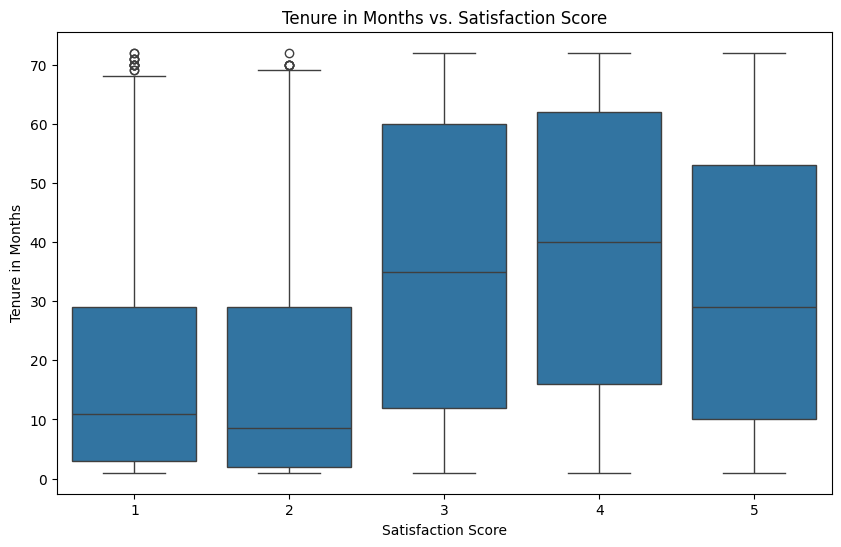

In [ ]:
# Boxplot de Tenure in Months vs. Satisfaction Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Satisfaction Score', y='Tenure in Months', data=df)
plt.title('Tenure in Months vs. Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Tenure in Months')
plt.show()

Se puede observar que el los grupos con menor puntaje de satisfacción (1 y 2) tienen menos tiempo en la empresa, mientras los grupos con puntaje intermedio (3 y 4) son los más antiguos y el mayor puntaje (5) representa a un grupo de cleintes con tiempo intermedio de 30 meses.

Además, se observa que los grupos con puntaje de satisfacción 1 y 2 outliers por encima del límite superior de los valores de tiempo de la empresa, lo que posteriormente deberán excluirse si se requiere hacer un análisis con dichos grupos.

##3.¿Existe correlación entre la satisfacción del cliente y la probabilidad de abandono?

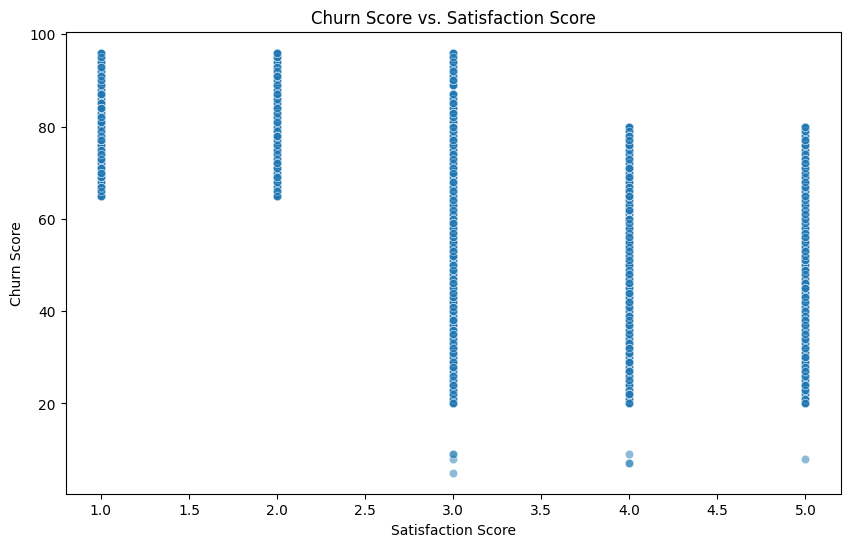

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Satisfaction Score', y='Churn Score', data=df, alpha=0.5)
plt.title('Churn Score vs. Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Churn Score')
plt.show()

Se observa que los puntajes más bajos de satisfacción se asocian a una alta probabilidad de abandono. Sin embargo, también se distingue queen los puntajes más altos de satisfacción (3 a 5)la probabildad de abandono es muy dispersa, por lo que no se logra identificar un patrón en puntajes de satisfacción de medio a alto (3 a 5).

##4. ¿Qué otros factores influyen sobre la probabilidad de abandono del cliente?

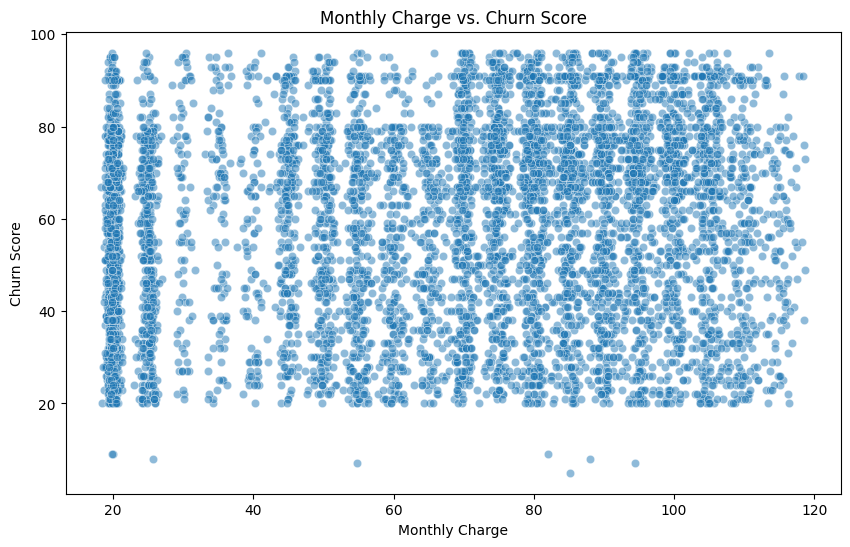

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Monthly Charge', y='Churn Score', data=df, alpha=0.5)
plt.title('Monthly Charge vs. Churn Score')
plt.xlabel('Monthly Charge')
plt.ylabel('Churn Score')
plt.show()

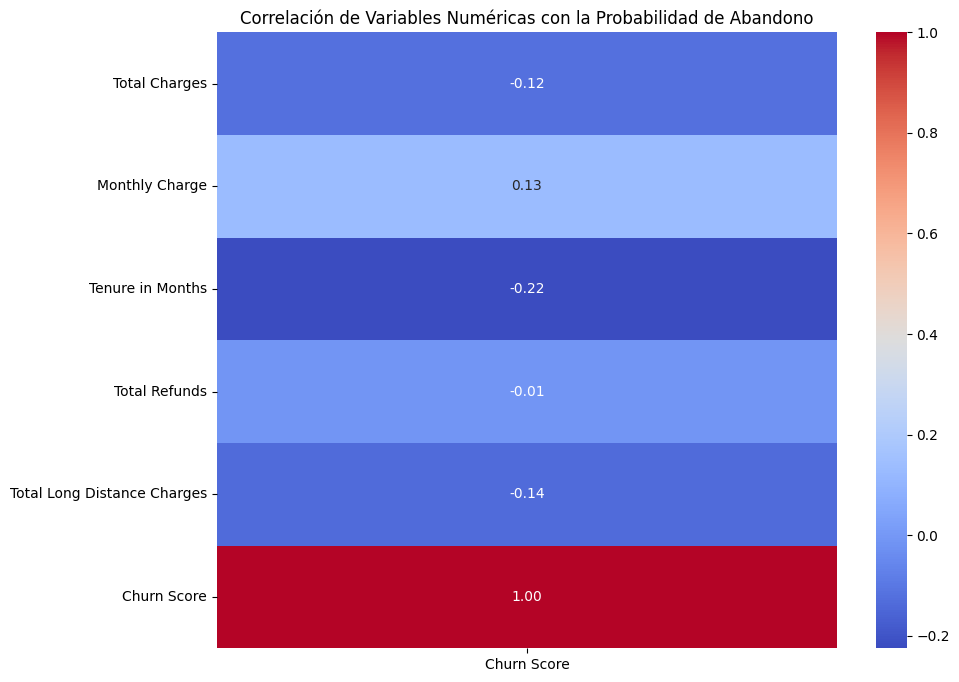

In [ ]:
# Heatmap para evaluar la correlación con algunas variables de interés
columns_of_interest = ['Total Charges', 'Monthly Charge', 'Tenure in Months',
                       'Total Refunds','Total Long Distance Charges', 'Churn Score']

correlation_matrix = df[columns_of_interest].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['Churn Score']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación de Variables Numéricas con la Probabilidad de Abandono')
plt.show()

En general, la probabilidad de abandono tiene una correlación muy baja con las variables seleccionadas, siendo la más estrecha de -0.22 con la variable Ternure in Months.